In [35]:
# 시각화를 위해 pandas를 임포트합니다
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다
from sklearn.datasets import load_iris
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes로 iris 데이터를 분류하도록 하겠습니다
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score를 임포트합니다
from sklearn import metrics
from sklearn.metrics import accuracy_score

# iris 데이터 시각화

In [36]:
# iris 데이터를 불러옵니다
dataset = load_iris()
# pandas의 데이터프레임으로 데이터를 저장합니다
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터프레임에 저장합니다
df['target'] = dataset.target
# 숫자인 분류값을 이해를 돕기위해 문자로 변경합니다
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
# 데이터를 확인해봅니다
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df.target.value_counts()

virginica     50
versicolor    50
setosa        50
Name: target, dtype: int64

# iris 데이터의 분포도 확인
iris 데이터의 분포도를 확인해보도록 하겠습니다.
아래 챠트에서 볼 수 있듯, iris 데이터의 분포도가 정규분포(Gaussian Distribution)과 유사합니다.  

In [38]:
# 분류값 별로 데이터프레임을 나눕니다
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

## sepal length (cm)

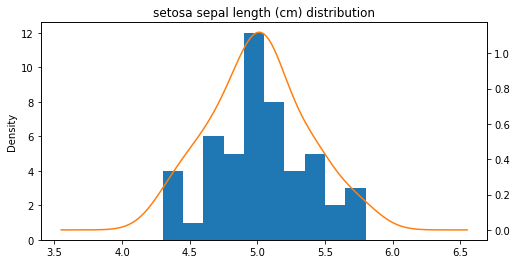

In [39]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="setosa sepal length (cm) distribution", figsize = (8,4))

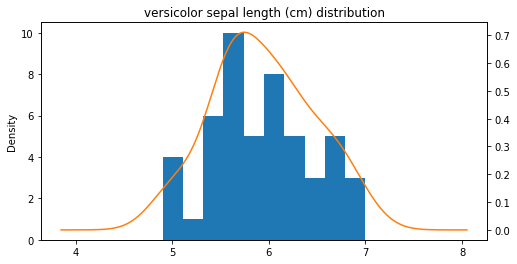

In [40]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="versicolor sepal length (cm) distribution", figsize = (8,4))

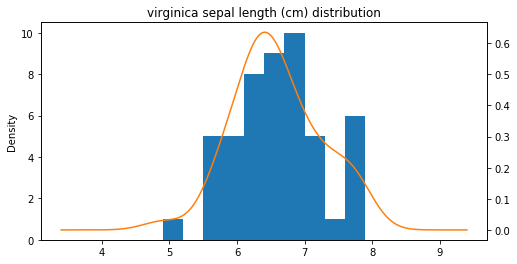

In [41]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="virginica sepal length (cm) distribution", figsize = (8,4))

## sepal width (cm)	

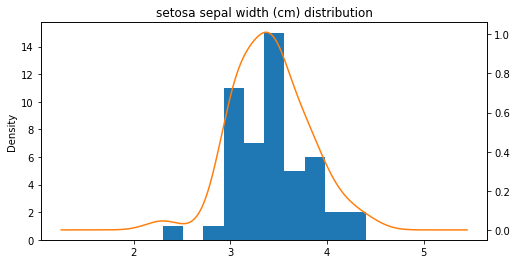

In [42]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="setosa sepal width (cm) distribution", figsize = (8,4))

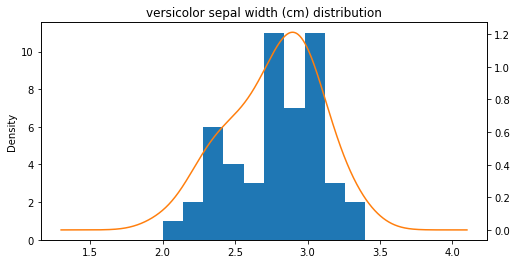

In [43]:
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="versicolor sepal width (cm) distribution", figsize = (8,4))

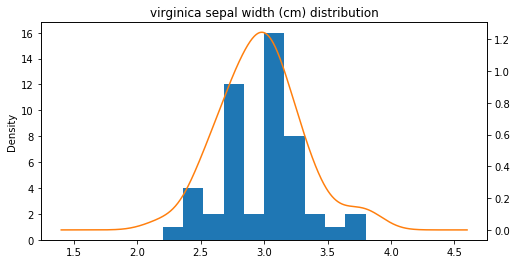

In [44]:
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="virginica sepal width (cm) distribution", figsize = (8,4))

## petal length (cm)

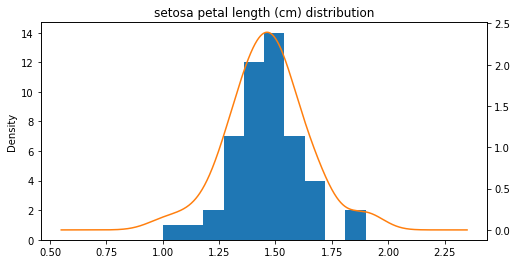

In [45]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="setosa petal length (cm) distribution", figsize = (8,4))

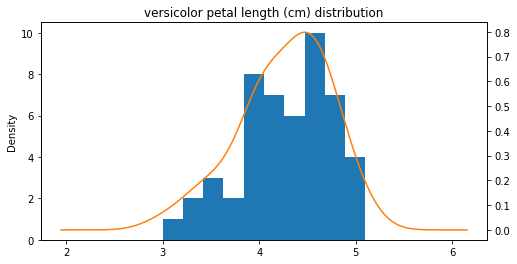

In [46]:
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="versicolor petal length (cm) distribution", figsize = (8,4))

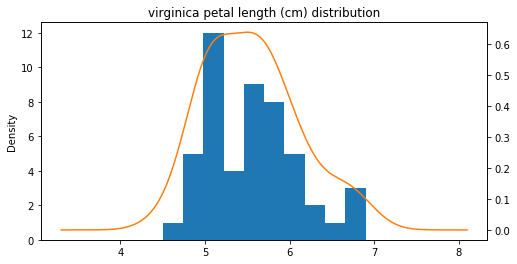

In [47]:
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="virginica petal length (cm) distribution", figsize = (8,4))

## petal width (cm)

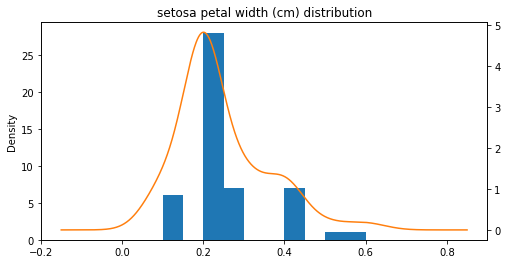

In [48]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="setosa petal width (cm) distribution", figsize = (8,4))

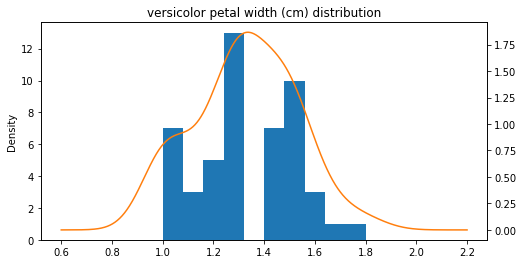

In [49]:
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="versicolor petal width (cm) distribution", figsize = (8,4))

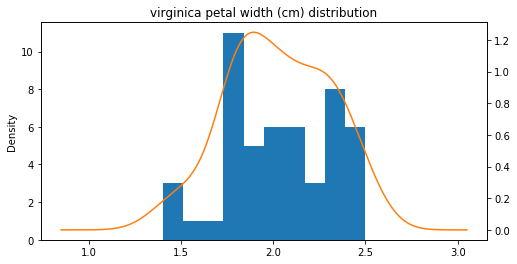

In [50]:
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title="virginica petal width (cm) distribution", figsize = (8,4))

# 데이터를 학습 데이터와 테스트 데이터로 나누기

In [51]:
# 20%를 테스트 데이터로 분류합니다
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2)

# Gaussian Naive Bayes 분류하기

In [52]:
# 학습데이터로 모델을 학습합니다
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 테스트합니다
expected = y_test
predicted = model.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.91      1.00      0.95        10
          2       1.00      0.93      0.96        14

avg / total       0.97      0.97      0.97        30



In [54]:
accuracy_score(y_test, predicted)

0.9666666666666667

# Confusion Matrix
아래 confusion matrix에서 보실 수 있듯이 1개의 데이터만 제외하고, 모든 데이터가 정확히 분류되었습니다.

In [55]:
print(metrics.confusion_matrix(expected, predicted))

[[ 6  0  0]
 [ 0 10  0]
 [ 0  1 13]]
